In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

### Review of lecture 11

In Lecture 11, we learned:

- Learned about **lambda** functions

- How to use **map( )**, **filter( )**, and  **reduce( )** 

- Explored the joys of "List comprehension"

 



#### In this lecture we will:

- Tricks with pandas
- Filtering 
- concatentating and merging dataframes


### Locating and Editing Data

Today we are going to  learn about filtering pandas DataFrames to tease out useful information. We will be looking at data on Holocene Eruptions from the Smithsonian Holocene Volcano Database (https://volcano.si.edu/list_volcano_holocene.cfm). We will see how to filter these data  to pull out interesting information on Holocene Eruptions. Let's read in this data and look at its length.

In [2]:
EruptionData=pd.read_excel('Datasets/GVP_Eruption_Results.xlsx',header=1)
print('Number of Eruptions:',len(EruptionData))
EruptionData.head()

Number of Eruptions: 11134


,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,290390,Alaid,22281,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,21.0,NaN,50.861,155.565
1,352090,Sangay,22283,Confirmed Eruption,NaN,2.0,NaN,NaN,2018,NaN,...,Historical Observations,>,2018.0,NaN,12.0,NaN,7.0,NaN,-2.005,-78.341
2,345020,Rincon de la Vieja,22282,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,12.0,NaN,3.0,NaN,10.830,-85.324
3,284096,Nishinoshima,22280,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,7.0,NaN,12.0,NaN,27.247,140.874
4,353050,"Negra, Sierra",22279,Confirmed Eruption,Summit crater and NNW flank,2.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,23.0,NaN,-0.830,-91.170


Wow, that's a lot of Eruptions! However, the DataFrame has a lot of information we really aren't interested in. For example, there are many eruptions in this data that are "unconfirmed". 

In Lecture 9, we learned how to filter a DataFrame by putting  what we wanted in  a conditional statement enclosed in square brackets.  Remembering from Lecture 4 that the conditional for "equal to" is "==", we can retrieve all the rows that contain 'Confirmed Eruption' in the column 'Eruption Category' like this this: 

In [9]:
#notice the conditional '==' which means 'equals to' from Lecture 4
EruptionData[EruptionData['Eruption Category']=='Confirmed Eruption'].head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,290390,Alaid,22281,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,21.0,NaN,50.861,155.565
1,352090,Sangay,22283,Confirmed Eruption,NaN,2.0,NaN,NaN,2018,NaN,...,Historical Observations,>,2018.0,NaN,12.0,NaN,7.0,NaN,-2.005,-78.341
2,345020,Rincon de la Vieja,22282,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,12.0,NaN,3.0,NaN,10.830,-85.324
3,284096,Nishinoshima,22280,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,7.0,NaN,12.0,NaN,27.247,140.874
4,353050,"Negra, Sierra",22279,Confirmed Eruption,Summit crater and NNW flank,2.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,23.0,NaN,-0.830,-91.170


Pandas **DataFrames** also have a method called .loc that allows for filtering of **DataFrames** in a similar way to the familiar conditional above. 

In [10]:
ConfirmedEruptions=EruptionData.loc[EruptionData['Eruption Category']=='Confirmed Eruption']
ConfirmedEruptions.head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,290390,Alaid,22281,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,21.0,NaN,50.861,155.565
1,352090,Sangay,22283,Confirmed Eruption,NaN,2.0,NaN,NaN,2018,NaN,...,Historical Observations,>,2018.0,NaN,12.0,NaN,7.0,NaN,-2.005,-78.341
2,345020,Rincon de la Vieja,22282,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,12.0,NaN,3.0,NaN,10.830,-85.324
3,284096,Nishinoshima,22280,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,7.0,NaN,12.0,NaN,27.247,140.874
4,353050,"Negra, Sierra",22279,Confirmed Eruption,Summit crater and NNW flank,2.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,23.0,NaN,-0.830,-91.170


This statement  does exactly the same thing as the conditional.  The syntax of a .loc statement might look more complicated, but trust us, it will make your life easier as things get more complicated. It is 
 is computationally faster and has more tricks up its sleeve as we shall see soon.  :)  

Now let's look at some big eruptions we might be interested in (who wouldn't be?). Our dataset has a column called 'VEI' or 'Volcanic Explosivity Index' that depends on the amount of material erupted, and the height of the plume.

One of the most famous Volcanic eruptions is the 1980 Eruption of Mount St. Helens (Washington State). To find it, let's search for  Holocene Eruptions of Mount St. Helens with a VEI>4.

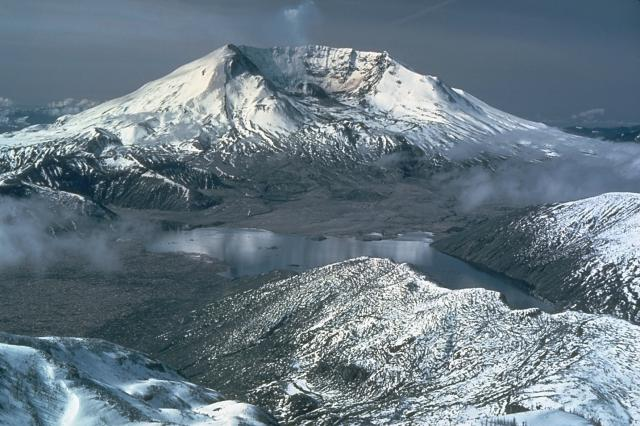

In [11]:
Image(filename='Figures/StHelens.jpg')

Image from: Global Volcanism Program, 2013. St. Helens (321050) in Volcanoes of the World, v. 4.7.5. Venzke, E (ed.). Smithsonian Institution. Downloaded 31 Dec 2018 (https://volcano.si.edu/volcano.cfm?vn=321050)

In [12]:
ConfirmedEruptions.loc[(ConfirmedEruptions['Volcano Name']=='St. Helens')&(ConfirmedEruptions['VEI']>4.0)]

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
1567,321050,St. Helens,20557,Confirmed Eruption,Summit and north flank,5.0,NaN,NaN,1980,NaN,...,Historical Observations,NaN,1986.0,NaN,10.0,NaN,28.0,3.0,46.2,-122.18
6166,321050,St. Helens,20544,Confirmed Eruption,N flank--Goat Rocks area,5.0,NaN,NaN,1800,NaN,...,Dendrochronology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
7523,321050,St. Helens,20541,Confirmed Eruption,NaN,5.0,NaN,NaN,1482,NaN,...,Dendrochronology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
7525,321050,St. Helens,20540,Confirmed Eruption,NaN,5.0,+,NaN,1480,NaN,...,Dendrochronology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
9042,321050,St. Helens,20529,Confirmed Eruption,NaN,5.0,NaN,?,-530,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
9545,321050,St. Helens,20521,Confirmed Eruption,NaN,5.0,NaN,NaN,-1770,100.0,...,Tephrochronology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
9580,321050,St. Helens,20520,Confirmed Eruption,NaN,6.0,NaN,?,-1860,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18
9752,321050,St. Helens,20518,Confirmed Eruption,NaN,5.0,NaN,?,-2340,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,-122.18


As we can see, simple conditional statements like this enable us to filter large datasets for the small amount of information we're interested in.

Although the above statement would work equally well without the ".loc", we can add some whistles and bells.   The use of the ".loc" syntax allows you search through a particular column (Series) by putting a comma after your conditional statement followed by another Series name. Say we wanted the 'Start Year' of this eruption.  We could do this:

In [13]:
EruptionYears=ConfirmedEruptions.loc[ConfirmedEruptions['Volcano Name']=='St. Helens','Start Year']
EruptionYears.head()

575     2004
1148    1990
1181    1989
1567    1980
5317    1857
Name: Start Year, dtype: int64

But wait,  there's more! .loc also allows you to take a slice through the columns list to select a specific range of column headers:

In [14]:
ColumnSlice=ConfirmedEruptions.loc[ConfirmedEruptions['Volcano Name']=='St. Helens','VEI':'End Year']
ColumnSlice.head()

,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,Start Month,Start Day Modifier,Start Day,Start Day Uncertainty,Evidence Method (dating),End Year Modifier,End Year
575,2.0,NaN,NaN,2004,NaN,10.0,NaN,1.0,NaN,Historical Observations,NaN,2008.0
1148,3.0,?,NaN,1990,NaN,11.0,NaN,5.0,NaN,Historical Observations,NaN,1991.0
1181,2.0,NaN,NaN,1989,NaN,12.0,NaN,7.0,NaN,Historical Observations,NaN,1990.0
1567,5.0,NaN,NaN,1980,NaN,3.0,NaN,27.0,NaN,Historical Observations,NaN,1986.0
5317,2.0,NaN,NaN,1857,NaN,4.0,NaN,0.0,NaN,Historical Observations,NaN,NaN


Something else .loc can do is to change the values inplace in DataFrames easily. Let's say we found a historical document that told us that the 1800 Eruption at Mount St. Helens ended in 1805. We want to update the information in the DataFrame and can do it this way: 

In [15]:
ConfirmedEruptions.loc[(ConfirmedEruptions['Volcano Name']=='St. Helens')&(ConfirmedEruptions['Start Year']==1800),'End Year']=1805
ConfirmedEruptions[(ConfirmedEruptions['Volcano Name']=='St. Helens')&(ConfirmedEruptions['Start Year']==1800)]

/Users/brendan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
6166,321050,St. Helens,20544,Confirmed Eruption,N flank--Goat Rocks area,5.0,NaN,NaN,1800,NaN,...,Dendrochronology,NaN,1805.0,NaN,NaN,NaN,NaN,NaN,46.2,-122.18


Never mind about the annoying error message. It's just warning us that changing ConfirmedEruptions won't change EruptionData.

As we can see, the syntax for this can get  complicated quickly, but we can retrieve lots of data using a few lines of code. 

### Sorting and Indexing

What if we wanted to sort this dataset so the most explosive eruptions were first? Pandas DataFrames have a method for this called sort_values. Normally, this will sort from lowest to highest (an "ascending" sort), but we can use the argument ascending=False to tell it to sort from highest to lowest.

In [18]:
BiggesttoSmallest=ConfirmedEruptions.sort_values(by='VEI',ascending=False)
BiggesttoSmallest.head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
8107,305060,Changbaishan,19644,Confirmed Eruption,NaN,7.0,?,NaN,942,4.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.980,128.080
9746,355210,"Blanco, Cerro",20904,Confirmed Eruption,NaN,7.0,NaN,NaN,-2300,160.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.789,-67.765
9493,212040,Santorini,13879,Confirmed Eruption,NaN,7.0,?,NaN,-1610,14.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.404,25.396
10732,300023,Kurile Lake,18903,Confirmed Eruption,NaN,7.0,NaN,NaN,-6440,25.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.450,157.120
6083,264040,Tambora,16231,Confirmed Eruption,NaN,7.0,NaN,NaN,1812,NaN,...,Historical Observations,NaN,1815.0,NaN,7.0,?,15.0,NaN,-8.250,118.000


Looks like the biggest eruptions during the Holocene were VEI of 7.0. Now let's try to get the first 10 rows in this DataFrame. We can do this using .loc, right?

In [19]:
BiggesttoSmallest.loc[0:10]

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,290390,Alaid,22281,Confirmed Eruption,NaN,1.0,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,8.0,NaN,21.0,NaN,50.861,155.565
4488,211060,Etna,13763,Confirmed Eruption,Central Crater,1.0,NaN,NaN,1893,NaN,...,Historical Observations,NaN,1898.0,NaN,6.0,NaN,0.0,NaN,37.748,14.999
1870,358060,Lautaro,12320,Confirmed Eruption,NaN,1.0,NaN,NaN,1972,NaN,...,Historical Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-49.020,-73.550
1512,241050,Okataina,14526,Confirmed Eruption,Waimangu (Raupo Pond crater),1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,5.0,NaN,16.0,15.0,-38.120,176.500
1518,312030,Pavlof,20144,Confirmed Eruption,NaN,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,5.0,NaN,28.0,NaN,55.417,-161.894
1521,345040,Poas,11182,Confirmed Eruption,NaN,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,5.0,NaN,16.0,15.0,10.200,-84.233
1523,268040,Gamkonora,16593,Confirmed Eruption,NaN,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,7.0,NaN,25.0,NaN,1.380,127.530
1524,285040,Shikotsu,18633,Confirmed Eruption,Tarumai,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,2.0,NaN,27.0,NaN,42.688,141.380
1526,344040,Telica,10930,Confirmed Eruption,NaN,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.606,-86.840
1530,300260,Klyuchevskoy,19461,Confirmed Eruption,NaN,1.0,NaN,NaN,1981,NaN,...,Historical Observations,NaN,1981.0,NaN,8.0,?,4.0,NaN,56.056,160.642


Oops!  This didn't work as expected did it?  Instead, we got the all the rows between the indices of 0 and 10 which are not in any particular order now.  When we sorted by VEI, Pandas did not assign new indices and put the records in no particular order within a particular VEI value.  This is a "feature" of sorting functions.  So... to get what we really wanted, which was the first 10 records in the BiggesttoSmallest DataFrame we can use the method ".iloc" instead of ".loc".   

In [20]:
BiggesttoSmallest.iloc[0:10]

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
8107,305060,Changbaishan,19644,Confirmed Eruption,NaN,7.0,?,NaN,942,4.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.980,128.080
9746,355210,"Blanco, Cerro",20904,Confirmed Eruption,NaN,7.0,NaN,NaN,-2300,160.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.789,-67.765
9493,212040,Santorini,13879,Confirmed Eruption,NaN,7.0,?,NaN,-1610,14.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.404,25.396
10732,300023,Kurile Lake,18903,Confirmed Eruption,NaN,7.0,NaN,NaN,-6440,25.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.450,157.120
6083,264040,Tambora,16231,Confirmed Eruption,NaN,7.0,NaN,NaN,1812,NaN,...,Historical Observations,NaN,1815.0,NaN,7.0,?,15.0,NaN,-8.250,118.000
7823,264030,Rinjani,20843,Confirmed Eruption,Samalas,7.0,?,NaN,1257,NaN,...,Ice Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.420,116.470
10558,322160,Crater Lake,20610,Confirmed Eruption,Mt. Mazama summit and flank vents,7.0,NaN,NaN,-5680,150.0,...,Ice Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.930,-122.120
10242,282060,Kikai,16980,Confirmed Eruption,Kikai caldera,7.0,NaN,?,-4350,NaN,...,Radiocarbon (uncorrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.793,130.305
8910,242030,Raoul Island,14686,Confirmed Eruption,Denham caldera,6.0,NaN,NaN,-250,75.0,...,Radiocarbon (uncorrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.270,-177.920
7797,352060,Quilotoa,11597,Confirmed Eruption,NaN,6.0,NaN,?,1280,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.850,-78.900


Much better. Now we can see that there were 8 VEI 7.0 eruptions during the Holocene (that we know of). 

On the other hand, the problem we had with indexing can be dealt with by re-indexing our sorted DataFrame.  To re-index a Pandas DataFrame,  we use the  **.set_index( )** method. 

This will set the index to a list of values from 0 to the length of the Dataframe.

In [21]:
newIndexValues=list(range(len(BiggesttoSmallest)))
BiggesttoSmallest=BiggesttoSmallest.set_index([newIndexValues])
BiggesttoSmallest.head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,305060,Changbaishan,19644,Confirmed Eruption,NaN,7.0,?,NaN,942,4.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.980,128.080
1,355210,"Blanco, Cerro",20904,Confirmed Eruption,NaN,7.0,NaN,NaN,-2300,160.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.789,-67.765
2,212040,Santorini,13879,Confirmed Eruption,NaN,7.0,?,NaN,-1610,14.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.404,25.396
3,300023,Kurile Lake,18903,Confirmed Eruption,NaN,7.0,NaN,NaN,-6440,25.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.450,157.120
4,264040,Tambora,16231,Confirmed Eruption,NaN,7.0,NaN,NaN,1812,NaN,...,Historical Observations,NaN,1815.0,NaN,7.0,?,15.0,NaN,-8.250,118.000


Another thing about indices:  We can set the indices to one of the other column names, for example the "Volcano Name".  

In [22]:
BiggesttoSmallest=BiggesttoSmallest.set_index('Volcano Name')
BiggesttoSmallest.head()

,Volcano Number,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,Start Month,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
Volcano Name,,,,,,,,,,,,,,,,,,,,,
Changbaishan,305060,19644,Confirmed Eruption,NaN,7.0,?,NaN,942,4.0,0.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.980,128.080
"Blanco, Cerro",355210,20904,Confirmed Eruption,NaN,7.0,NaN,NaN,-2300,160.0,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.789,-67.765
Santorini,212040,13879,Confirmed Eruption,NaN,7.0,?,NaN,-1610,14.0,0.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.404,25.396
Kurile Lake,300023,18903,Confirmed Eruption,NaN,7.0,NaN,NaN,-6440,25.0,0.0,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.450,157.120
Tambora,264040,16231,Confirmed Eruption,NaN,7.0,NaN,NaN,1812,NaN,0.0,...,Historical Observations,NaN,1815.0,NaN,7.0,?,15.0,NaN,-8.250,118.000


### Concatenation and Merging

The eruptions DataFrame we read in above only contains events that started before September 2018.
Newer data are contained in the 'GVP_Eruption_Results_2' spreadsheet. Let's add this to our previous DataFrame. First let's read in the data:

In [23]:
NewEruptions=pd.read_excel('Datasets/GVP_Eruption_Results_2.xlsx',header=1)
NewEruptions.head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,357040,Planchon-Peteroa,22297,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018,NaN,12,NaN,16,NaN,-35.223,-70.568
1,357090,Copahue,22299,Confirmed Eruption,Agrio Crater,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018,NaN,12,NaN,7,NaN,-37.856,-71.183
2,267020,Karangetang,22294,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018,NaN,11,NaN,25,NaN,2.781,125.407
3,282050,Kuchinoerabujima,22296,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,>,2018,NaN,12,NaN,18,NaN,30.443,130.217
4,268060,Gamalama,22295,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018,NaN,10,NaN,6,NaN,0.800,127.330


We would like to combine (concatenate) the two datasets into a single DataFrame.  Fortunately, Pandas has a **.concat()** method that allows us to do just that,  provided both have the same columns. If we use the argument ignore_index=True, the new (or re-used in this case) DataFrame will be automatically re-ndexed for us.

In [24]:
ConfirmedEruptions=pd.concat([NewEruptions,ConfirmedEruptions],ignore_index=True)
ConfirmedEruptions.head()


,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,357040,Planchon-Peteroa,22297,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,12.0,NaN,16.0,NaN,-35.223,-70.568
1,357090,Copahue,22299,Confirmed Eruption,Agrio Crater,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,12.0,NaN,7.0,NaN,-37.856,-71.183
2,267020,Karangetang,22294,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,11.0,NaN,25.0,NaN,2.781,125.407
3,282050,Kuchinoerabujima,22296,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,>,2018.0,NaN,12.0,NaN,18.0,NaN,30.443,130.217
4,268060,Gamalama,22295,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Historical Observations,NaN,2018.0,NaN,10.0,NaN,6.0,NaN,0.800,127.330


In [25]:
ConfirmedEruptions.tail()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
9867,241080,Tongariro,14555,Confirmed Eruption,NaN,NaN,NaN,?,-9850,NaN,...,Radiocarbon (corrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.157,175.632
9868,327812,Red Hill,22193,Confirmed Eruption,Cerro Pomo?,NaN,NaN,NaN,-9850,500.0,...,Surface Exposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.250,-108.830
9869,213020,Nemrut Dagi,13908,Confirmed Eruption,NaN,NaN,NaN,NaN,-9950,150.0,...,Varve Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.654,42.229
9870,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,NaN,NaN,-10060,NaN,...,Radiocarbon (uncorrected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.420,-113.500
9871,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,NaN,NaN,-10450,4800.0,...,Surface Exposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.889,31.933


Looks like it worked.

### Let's do some science

It would be nice to know more about these volcanoes. Fortunately the Smithsonian Holocene Volcano Database provides a lot more stuff in it. These data are in a separate file called 'GVP_Volcano_List_Holocene.xlsx'. Let's read these in.

In [26]:
VolcanoData=pd.read_excel('Datasets/GVP_Volcano_List_Holocene.xlsx',header=1) 
VolcanoData.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


The 'Volcano Number' in this DataFrame is the same as in the previous one. We are now faced with a different problem than one **.concat( )** can solve as the new dataset has different columns. To help us out in this case,  Pandas has a DataFrame method called **.merge( )** that allows us to merge two DataFrames. The DataFrame being operated on with the **.merge( )** method is considered the 'left' DataFrame, and the one getting merged into it is the 'right' DataFrame. The **.merge( )** method takes values from each depending on an argument 'how'. The different types of **.merge( )** actions are displayed in the image below (Source: StackOverflow)

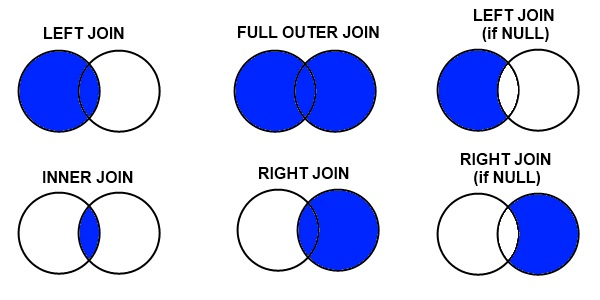

In [27]:
Image(filename='Figures/join-types.jpg')

 The ConfirmedEruptions DataFrame can have the same volcano number multiple times (for multiple eruptions) but the VolcanoData DataFrame only has a single entry for each volcano. As such we want a 'left' join that takes the rows from the ConfirmedEruptions DataFrame, and merges the information from the VolcanoData DataFrame onto the the ConfirmedEruptions DataFrame.  So the VolcanoData DataFrame is the "right" DataFrame.  We want to merge on the 'Volcano Number' in both left and right DataFrames.

In [28]:
MergedEruptions=ConfirmedEruptions.merge(VolcanoData,how='left',left_on='Volcano Number',right_on='Volcano Number')
MergedEruptions.head()

,Volcano Number,Volcano Name_x,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude_y,Longitude_y,Elevation (m),Dominant Rock Type,Tectonic Setting
0,357040,Planchon-Peteroa,22297,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,-35.223,-70.568,3977.0,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
1,357090,Copahue,22299,Confirmed Eruption,Agrio Crater,NaN,NaN,NaN,2018,NaN,...,Stratovolcano,Eruption Observed,2018 CE,South America,Central Chile and Argentina,-37.856,-71.183,2953.0,Trachybasalt / Tephrite Basanite,Subduction zone / Continental crust (>25 km)
2,267020,Karangetang,22294,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Stratovolcano,Eruption Observed,2018 CE,Indonesia,Sangihe Islands,2.781,125.407,1797.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km)
3,282050,Kuchinoerabujima,22296,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Stratovolcano(es),Eruption Observed,2018 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.443,130.217,657.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km)
4,268060,Gamalama,22295,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Stratovolcano(es),Eruption Observed,2018 CE,Indonesia,Halmahera,0.800,127.330,1715.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km)


### Using .unique( ) to find a list of categories, and string operations

Now that we have more information, we can start classifying these eruptions by type. For example, what tectonic settings are represented in this dataset? Pandas has a method called **.unique( )** that allows us to find all the unique values in a column.

In [29]:
list(MergedEruptions['Tectonic Setting'].unique())

['Subduction zone / Continental crust (>25 km)',
 'Subduction zone / Oceanic crust (< 15 km)',
 'Subduction zone / Intermediate crust (15-25 km)',
 'Subduction zone / Crustal thickness unknown',
 'Rift zone / Oceanic crust (< 15 km)',
 'Intraplate / Oceanic crust (< 15 km)',
 'Rift zone / Continental crust (>25 km)',
 'Intraplate / Intermediate crust (15-25 km)',
 'Rift zone / Intermediate crust (15-25 km)',
 'Intraplate / Continental crust (>25 km)',
 nan]

This tells us some useful information, including that some of the values are not a number (or 'nan' in Pandish). We can get rid of these using the method **.dropna( )**

In [30]:
MergedEruptions.dropna(subset=['Tectonic Setting'],inplace=True)
# inplace=True does the method 'in place' so we don't have to assign it to a new DataFrame

Let's also get an approximate duration of each of these eruptions by subtracting the start date from the end date

In [31]:
MergedEruptions['StartTime']=MergedEruptions['Start Year']\
                +(MergedEruptions['Start Month']-1)/12+(MergedEruptions['Start Day']-1)/365.25
MergedEruptions['EndTime']=MergedEruptions['End Year']\
                +(MergedEruptions['End Month']-1)/12+(MergedEruptions['End Day']-1)/365.25
MergedEruptions['Duration']=MergedEruptions['EndTime']-MergedEruptions['StartTime']


What if we wanted to know about all the eruptions that occurred in a subduction zone setting? This is difficult as these data are stored as strings. Fortunately Pandas has a **.str( )** method for columns which itself has several methods, one of which is called **str.contains(SUBSTRING)**. The  **str.contains(SUBSTRING)** method finds cells in the column that contain **SUBSTRING**, for example, 'Subduction'. 

For more information on Pandas **.str( )** methods, see https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html

So now we fish out all the records that have a 'Tectonic Setting' string that contains 'Subduction':

In [32]:
Subduction=MergedEruptions.loc[MergedEruptions['Tectonic Setting'].str.contains('Subduction')]
Subduction.head()

,Volcano Number,Volcano Name_x,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Region,Subregion,Latitude_y,Longitude_y,Elevation (m),Dominant Rock Type,Tectonic Setting,StartTime,EndTime,Duration
0,357040,Planchon-Peteroa,22297,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,South America,Central Chile and Argentina,-35.223,-70.568,3977.0,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),2018.957734,2018.957734,0.000000
1,357090,Copahue,22299,Confirmed Eruption,Agrio Crater,NaN,NaN,NaN,2018,NaN,...,South America,Central Chile and Argentina,-37.856,-71.183,2953.0,Trachybasalt / Tephrite Basanite,Subduction zone / Continental crust (>25 km),2018.919405,2018.933094,0.013689
2,267020,Karangetang,22294,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Indonesia,Sangihe Islands,2.781,125.407,1797.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2018.899042,2018.899042,0.000000
3,282050,Kuchinoerabujima,22296,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.443,130.217,657.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2018.804757,2018.963210,0.158453
4,268060,Gamalama,22295,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Indonesia,Halmahera,0.800,127.330,1715.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2018.758214,2018.763689,0.005476


Let's compare these to volcanoes found in intraplate oceanic crust settings.

In [33]:
IntraplateOceanic=MergedEruptions.loc[MergedEruptions['Tectonic Setting'].str.contains('Intraplate / Oceanic crust')]
IntraplateOceanic.head()

,Volcano Number,Volcano Name_x,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Region,Subregion,Latitude_y,Longitude_y,Elevation (m),Dominant Rock Type,Tectonic Setting,StartTime,EndTime,Duration
27,233020,"Fournaise, Piton de la",22261,Confirmed Eruption,NaN,0.0,NaN,NaN,2018,NaN,...,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632.0,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2018.255476,2018.833333,0.577858
47,233020,"Fournaise, Piton de la",22224,Confirmed Eruption,NaN,0.0,NaN,NaN,2017,NaN,...,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632.0,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2017.535592,2017.657255,0.121663
63,233020,"Fournaise, Piton de la",22184,Confirmed Eruption,NaN,0.0,NaN,NaN,2017,NaN,...,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632.0,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2017.082136,2017.154517,0.072382
80,233020,"Fournaise, Piton de la",22145,Confirmed Eruption,NaN,0.0,NaN,NaN,2016,NaN,...,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632.0,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2016.694045,2016.713210,0.019165
87,233020,"Fournaise, Piton de la",22144,Confirmed Eruption,Château Fort crater,0.0,NaN,NaN,2016,NaN,...,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632.0,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2016.401780,2016.404517,0.002738


We can plot 'Start Year' and 'VEI' of both of these types of eruptions to see if there are any relationships with tectonic setting. This time we'll use the **plt.scatter()** function (a new plotting method for your enjoyment).  

In [34]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
        because th

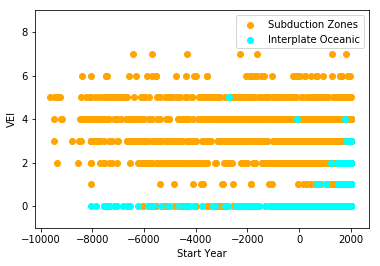

In [35]:
# plot the Subduction dates
plt.scatter(Subduction['Start Year'],Subduction['VEI'],c='orange',label='Subduction Zones')
# plot the Intraplate dates
plt.scatter(IntraplateOceanic['Start Year'],IntraplateOceanic['VEI'],c='cyan',\
            label='Interplate Oceanic')
plt.xlabel('Start Year')
plt.ylabel('VEI')
plt.ylim(-1,9)
plt.legend();

As we might expect, volcanoes in intraplate oceanic settings are less explosive (mostly) than those in subduction zone settings. This is partially because the lavas produced in oceanic intraplate are less viscous and trap less gasses.


### .groupby( ) and .describe( )

Pandas has a couple more methods that might be useful for looking at the distribution of these data. These are the **.groupby( )** and **.describe( )** methods. We can use these methods to look at the average VEI for each tectonic setting in our dataset.

**.groupby( )** groups things in your DataFrame by unique values in a **Series**, for example grouping everything by 'Tectonic Setting'.    **.describe( )** summarizes some useful statistics.  So if we wanted to know basic statistics for each tectonic setting (and who wouldn't?), we would do: 

In [39]:
MergedEruptions.groupby('Tectonic Setting')['VEI'].describe()

,count,mean,std,min,25%,50%,75%,max
Tectonic Setting,,,,,,,,
Intraplate / Continental crust (>25 km),83.0,2.108434,1.530280,0.0,1.5,2.0,3.0,7.0
Intraplate / Intermediate crust (15-25 km),11.0,2.090909,0.539360,1.0,2.0,2.0,2.0,3.0
Intraplate / Oceanic crust (< 15 km),485.0,0.709278,0.953472,0.0,0.0,0.0,2.0,5.0
Rift zone / Continental crust (>25 km),148.0,1.425676,1.299352,0.0,0.0,1.0,2.0,6.0
Rift zone / Intermediate crust (15-25 km),17.0,1.588235,1.277636,0.0,0.0,2.0,2.0,4.0
Rift zone / Oceanic crust (< 15 km),475.0,1.631579,1.507034,0.0,0.0,2.0,2.0,6.0
Subduction zone / Continental crust (>25 km),5036.0,2.214654,1.037046,0.0,2.0,2.0,3.0,7.0
Subduction zone / Crustal thickness unknown,336.0,1.723214,0.886480,0.0,1.0,2.0,2.0,6.0
Subduction zone / Intermediate crust (15-25 km),340.0,2.064706,0.981505,0.0,2.0,2.0,2.0,6.0


If we use these methods on a column with string data, it gives us the most common thing in that column associated with that tectonic setting.

In [40]:
MergedEruptions.groupby('Tectonic Setting')['Primary Volcano Type'].describe()

,count,unique,top,freq
Tectonic Setting,,,,
Intraplate / Continental crust (>25 km),210,11,Stratovolcano,97
Intraplate / Intermediate crust (15-25 km),27,2,Fissure vent(s),15
Intraplate / Oceanic crust (< 15 km),599,5,Shield,499
Rift zone / Continental crust (>25 km),234,12,Shield,82
Rift zone / Intermediate crust (15-25 km),21,5,Stratovolcano,7
Rift zone / Oceanic crust (< 15 km),749,11,Stratovolcano,222
Subduction zone / Continental crust (>25 km),6310,24,Stratovolcano,3287
Subduction zone / Crustal thickness unknown,366,10,Stratovolcano,125
Subduction zone / Intermediate crust (15-25 km),423,8,Stratovolcano,267


This tells us that around of 599 intraplate oceanic crust eruptions, 499 were at shield volcanoes, but only half of our subduction zone continental crust eruptions were stratovolcanoes.

In [ ]:
StH=ConfirmedEruptions
plt.scatter(EruptionData[EruptionData])